## Goal
- Implement classification with resnet18 in tinyImagenet dataset using d2l library
    - Wrap tiny imagenet data under d2l library
    - Fit with GPU
    - Record validation losses, accuracy, time taken to train

In [1]:
import d2l.torch as d2l
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from torchvision.models import resnet18
from d2l_data import TinyImagenetD2l
from models import ResnetD2l

In [2]:
batch_size = 256
num_workers = 2
learning_rate = 0.01
num_epochs = 20
device = d2l.try_gpu()
device

device(type='cuda', index=0)

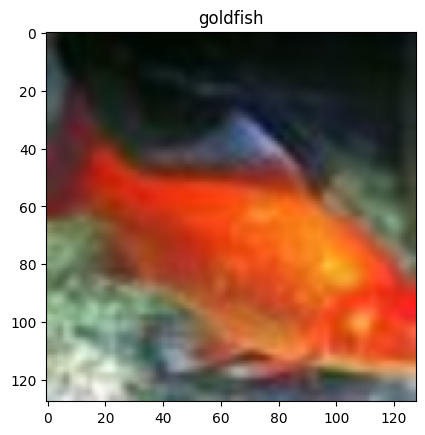

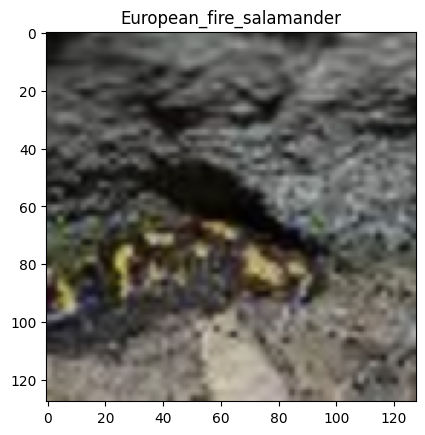

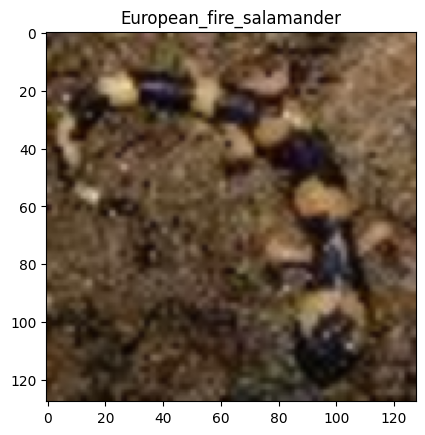

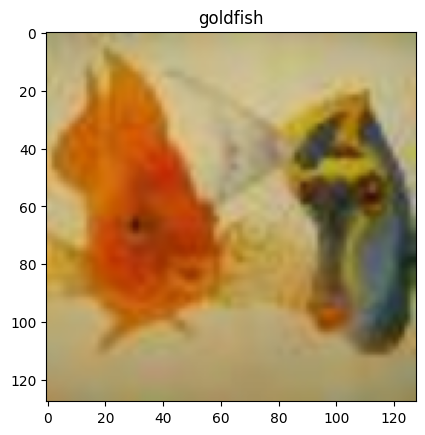

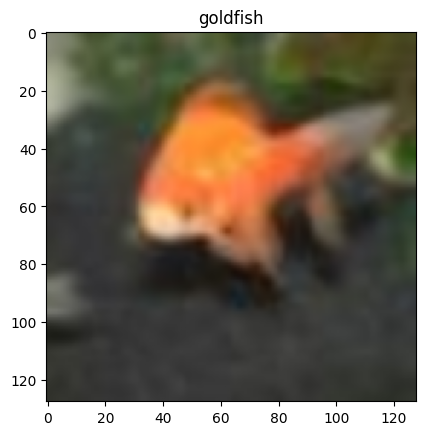

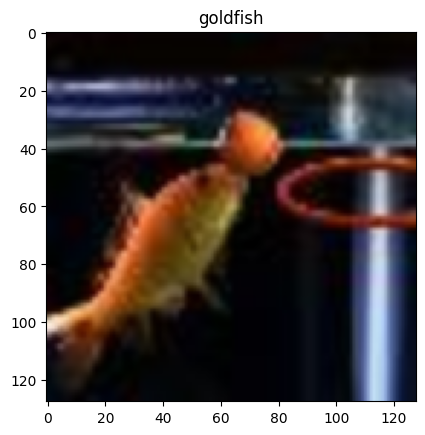

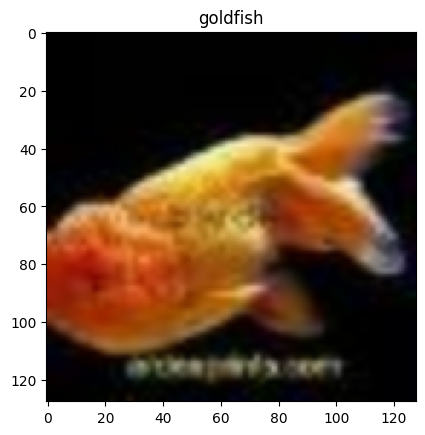

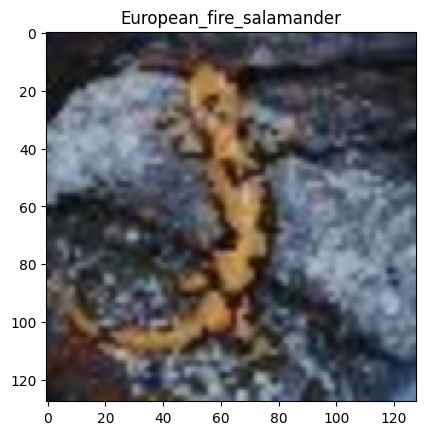

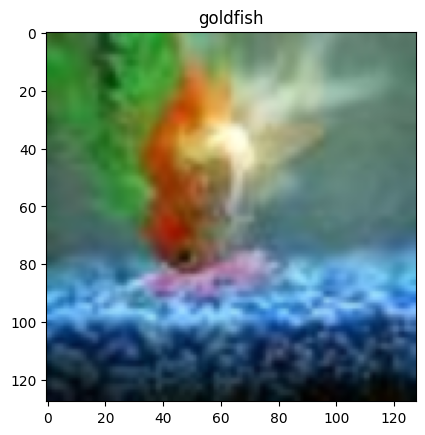

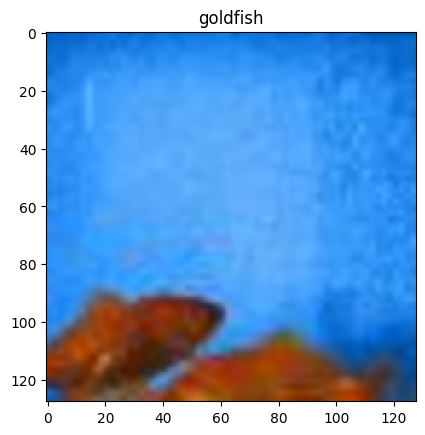

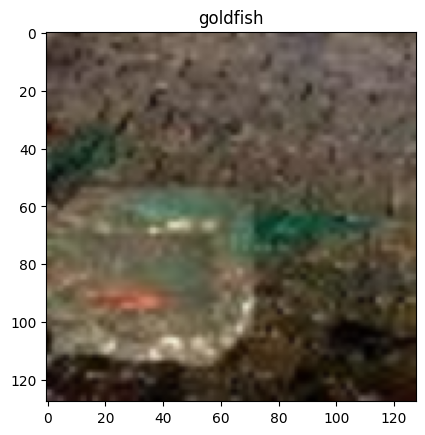

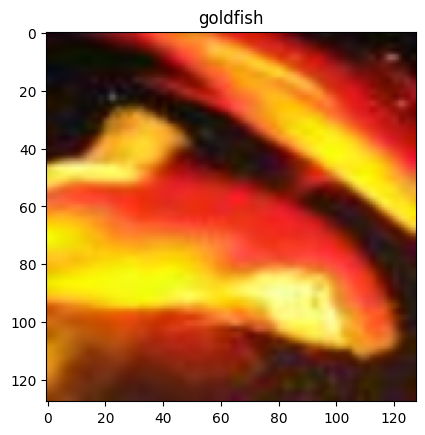

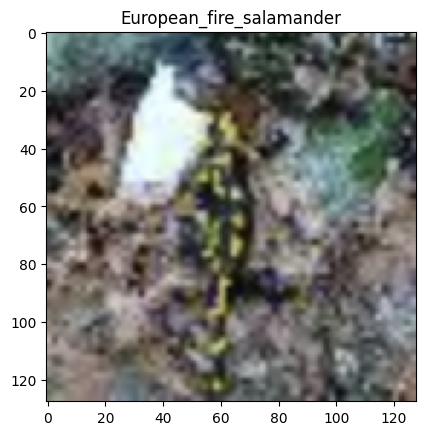

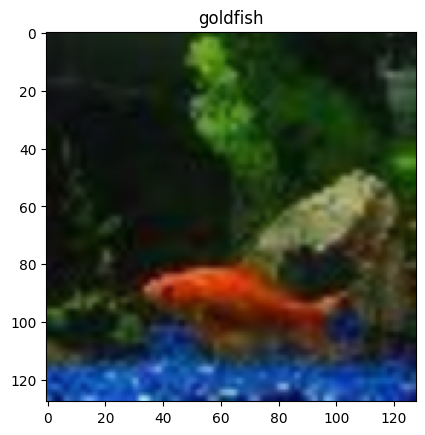

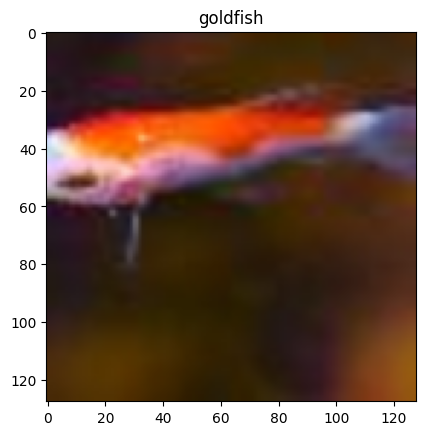

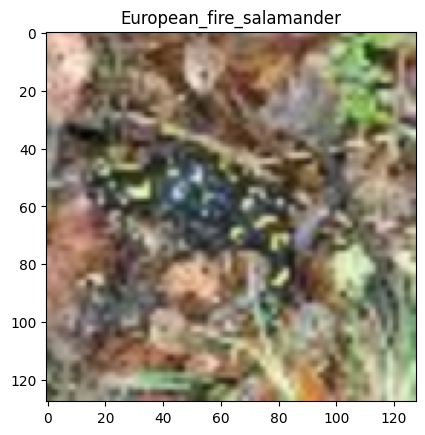

In [3]:
tiny_imagenet = TinyImagenetD2l(batch_size, num_workers, is_toy=True)
train_loader = tiny_imagenet.get_dataloader(train=True)
val_loader = tiny_imagenet.get_dataloader(train=False)

tiny_imagenet.visualize(next(iter(train_loader)))


### Train and evaluate model from random weights

In [4]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    x = batch['image']
    y = batch['label']
    return (x.to(self.device), y.to(self.device))

loss - train: 0.2411873106029816, val: 0.9822300098836422
accuracy - train: 0.9548794440925121, val: 0.785999983549118


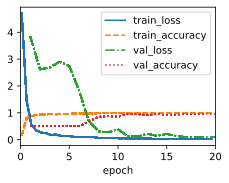

In [5]:

data = TinyImagenetD2l(batch_size, num_workers, is_toy=True)
num_training_batches = len(data.train_data)
num_val_batches = len(data.val_data)
model = ResnetD2l(num_classes=data.num_classes, pretrained=False, lr=learning_rate)
model.to(device)

trainer = d2l.Trainer(max_epochs=num_epochs, num_gpus=1)
trainer.device = device
trainer.fit(model=model, data=data)

model.display_metrics(num_training_batches, num_val_batches)




### Train and evaluate model with pretrained weights

loss - train: 0.3637324261828326, val: 0.7751663863658905
accuracy - train: 0.9105367712676525, val: 0.7874999910593032


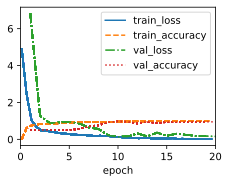

In [6]:

data = TinyImagenetD2l(batch_size, num_workers, is_toy=True)
num_training_batches = len(data.train_data)
num_val_batches = len(data.val_data)
model = ResnetD2l(num_classes=data.num_classes, pretrained=True, lr=learning_rate)
model.to(device)

trainer = d2l.Trainer(max_epochs=num_epochs, num_gpus=1)
trainer.device = device
trainer.fit(model=model, data=data)

model.display_metrics(num_training_batches, num_val_batches)


